<a href="https://colab.research.google.com/github/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/blob/master/activity01_CMS_dimuons(solution).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to save this notebook to your personal Drive**

To copy this notebook to your Google Drive, go to File and select "Save a copy in Drive", where it will automatically open the copy in a new tab for you to work in. This notebook will be saved into a folder on your personal Drive called "Colab Notebooks".


Still stumped? Check out <a href="https://www.youtube.com/watch?v=qaJ2UpMPXKk"> this video</a> for help

# Looking at the dimuon spectrum over a wide energy range

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

<b>Background</b>

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


$$ m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} $$

Some particles are very unstable and decay (turn into) to two or more other particles. In fact, they can decay so quickly, that they never interact with your detector! Yikes!

However, we can reconstruct the parent particle (sometimes referred to as <b>the initial state particle</b>) and its 4-momentum by adding the 4-momenta of the child particles (sometimes referred to as <b>the decay products</b>). 

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm child 0}} + \mathbf{P_{\rm child 1}} + \mathbf{P_{\rm child 2}} + ...$$



which breaks down into...

$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$


<b>Let's code!</b>

Here is some very, very basic starter code. It reads in data from the CMS experiment. 

If you haven't already, you will want to go through the <a href="https://colab.research.google.com/drive/1TFvNoq-i8isZoAwnZubRnNM0CrMGXUmP">CMS data model</a> (also included when you cloned this directory) exercise so you know how to pull out the relevant information. 

The following example runs with 1000 events that are included with this repository. To better see the full phyiscs, you can download a bigger file, <code>dimuons_100k.dat</code>. To download this file, see the <a href="https://colab.research.google.com/drive/174AUxy9qTqQ1XndbJW_Wryz9m95QZRIk">download_more_data</a> exercise, also included in this repository.

<b>NOTE: If you are getting an error saying that there is no module "pps_tools", go to Runtime, and then select Restart runtime. Also make sure that your runtime type is Python 3. </b>

In [1]:
###### This cell need only be run once per session ##########
###### Make sure your runtime type is Python 3  ############

# Import h5hep from Github. This is to allow us to read these
# particular files. 
!if [ ! -e h5hep ]; then git  clone https://github.com/mattbellis/h5hep.git; fi 
!cd h5hep; git pull; python setup.py -q install --user 

# Import custom tools package from Github. These are some simple accessor functions
# to make it easier to work with these data files. 
!if [ ! -e particle_physics_simplified ]; then git  clone https://github.com/mattbellis/particle_physics_simplified.git; fi
!cd particle_physics_simplified; git pull; python setup.py -q install --user

# Note that the -q option in the above "python setup.py ..." commands suppresses
# diagnostic output. So if you are having issues, you may want to remove the -q

import pps_tools as pps
import h5hep

Already up to date.
zip_safe flag not set; analyzing archive contents...
Already up to date.
zip_safe flag not set; analyzing archive contents...


In [2]:
###### This cell need only be run once per session ############################

# Fetch data file
pps.download_from_drive('dimuons_100k.hdf5')

In [3]:
# open and read data file
infile = 'data/dimuons_100k.hdf5'
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
Reading in event  10000
Reading in event  20000
Reading in event  30000
Reading in event  40000
Reading in event  50000
Reading in event  60000
Reading in event  70000
Reading in event  80000
Reading in event  90000


<h2><font color="red">Challenge!</font></h2>

Use the sample code to find the mass of the particle that the two muons came from (parent particle). 

To do this, you will need to loop over all pairs of muons for each collision, sum their 4-momenta (energy, px, py, and pz) and then use that to calculate the invariant mass. 

Do this for all possible pairs and in addition, break it down so that you calculate the invariant mass for the cases where:
* Both muons are positively charged.
* Both muons are negatively charged.
* The muons have opposite charges.

Be careful. Some collisions may have more than 2 muons, so write your code such that it calculates all possible pairs of muons in a given collisions. For example, if there are 3 muons in a collision, there are 3 possible pairs that you can make. 

<i>Hint!</i>

It is very likely that a particle exists where there is a peak in the data. However, this is not always true. 
A peak in the data is most likely the mass of a particle. You can look at the approximate mass to figure out which particle 
is found in the data.

Your histogram should look something like the following sketch. The value of the peaks should be the mass of a particle. You should be able to find two particles in their ground state. <a href="http://en.wikipedia.org/wiki/J/psi_meson">Check your answer for the first particle!</a> <a href="http://en.wikipedia.org/wiki/Upsilon_meson">Check your answer for the second particle!</a> 

In [4]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/dimuons_sketch.jpeg')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Create Empty lists
energies = []
momentum = []
mass = []

#Convert Lists to arrays using numpy

#momentum = np.array(momentum)
#energies = np.array(energies)
#mass = np.array(mass)


for collision in collisions:          # loops over all the events in the file
  muons = collision['muons']      # gets the list of all muons in the event
  
  for muon in muons:           # loops over each muon in the current event
    e = muon['e']               # gets the energy of the muon
    energies.append(e)         # puts the energy in a list
               
    
    px= muon["px"]
    py= muon["py"]
    pz= muon["pz"]
    
    E=e**2 
    P=px**2+py**2+pz**2
    M=(np.abs(E-P))**.5
    mass.append(M)
    # momentum.append(P**.5)

## So far we have the mass of all muons and the next plot shows the invariant mass distribution of the muons

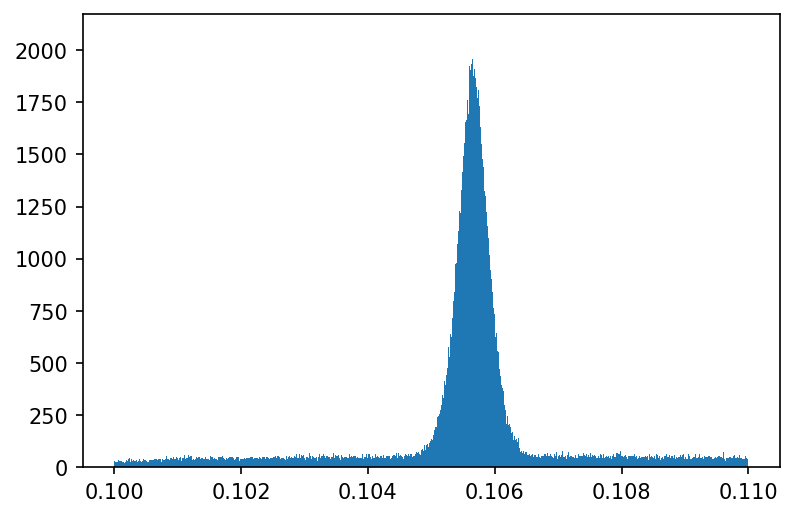

The value of the peak is 0.10565000000000001


In [7]:
plt.figure(dpi=150)
[n,bins,x]=plt.hist(mass,bins=1000,range=(0.10,0.11))
plt.show()
index=np.argmax(n)
print('The value of the peak is',bins[index])

# Calculating invariant mass per event

In [8]:
#Create Empty lists
mass = []

for collision in collisions:          # loops over all the events in the file
  muons = collision['muons']      # gets the list of all muons in the event

  # create empty lists for each collision

  energies = []
  px =[]
  py=[]
  pz=[]
  for muon in muons:           # loops over each muon in the current event
    # e = muon['e']               # gets the energy of the muon
    energies.append(muon['e'])         # puts the energy in a list
    px.append(muon["px"])
    py.append(muon["py"])
    pz.append(muon["pz"])
    # E=e**2 
    # P=px**2+py**2+pz**2
    # M=(np.abs(E-P))**.5
    # mass.append(M)
    # momentum.append(P**.5)
  e=np.sum(energies)
  px = np.sum(px)
  py = np.sum(py)
  pz = np.sum(pz) 
  E = e**2
  P=px**2+py**2+pz**2
  M=(np.abs(E-P))**.5
  mass.append(M)


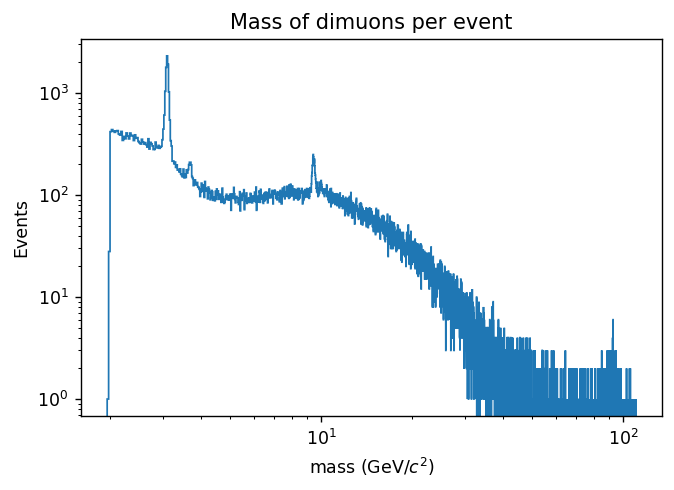

The value of the peak is 3.0812235867512303


In [31]:
bins=5000
plt.figure(dpi=125)
[n,bins,x]=plt.hist(mass,bins=bins,density=False,cumulative=False,histtype='step')
# plt.hist(mass,bins=bins,density=False,cumulative=True,histtype='step')
plt.xlabel('mass (GeV/$c^2$)')
plt.ylabel('Events')

plt.yscale('log')
plt.xscale('log')
plt.title('Mass of dimuons per event')
# plt.xlim(0,20)
# plt.savefig('Dimuon_mass.jpeg',dpi=500,optimize=True)
plt.show()
plt.close()
index=np.argmax(n)
print('The value of the peak is',bins[index])

#### Comments

Depending on which file you ran over, you may see hints of particles below 20 GeV/c$^2$. It is possible you see signs of other particles at even higher energies. Plot your masses over a wide range of values, but then zoom in (change the plotting range) on different mass ranges to see if you can identify these particles.  